### 자연어 처리에서의 EDA

In [12]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 제목 길이 분포

In [13]:
import pandas as pd

In [14]:
# 주소 확인
os.chdir("c:/머신러닝/미니프로젝트/데이터")
print(os.getcwd())

c:\머신러닝\미니프로젝트\데이터


In [15]:
pip install package openpyxl

  Using cached package-0.1.1.tar.gz (13 kB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\dkq50\anaconda3\envs\hamtori\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dkq50\\AppData\\Local\\Temp\\pip-install-imhhd1i1\\package_d087d78f6cf84f788f07a612b64dba99\\setup.py'"'"'; __file__='"'"'C:\\Users\\dkq50\\AppData\\Local\\Temp\\pip-install-imhhd1i1\\package_d087d78f6cf84f788f07a612b64dba99\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\dkq50\AppData\Local\Temp\pip-pip-egg-info-pvfu_0gr'
         cwd: C:\Users\dkq50\AppData\Local\Temp\pip-install-imhhd1i1\package_d087d78f6cf84f788f07a612b64dba99\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
   

In [16]:
# 데이터 불러오기
train = pd.read_csv('train.csv',sep='\t')
#test1 = pd.read_excel("민주주의 서울 자유제안 정보_17_19.xlsx")
test2 = pd.read_csv("민주주의 서울 자유제안 정보_20_22.csv",encoding='cp949')

In [17]:
train.head(1)

,글번호,제목,작성일,분류,내용,부서의견
0,150587,횡단보도 사각지대 반사경,2012-10-30,교통,운전을 하다보면 횡단보도 주변에 적치물들 때문에 사각지대가 형성되어 사람이 보이지 ...,"좋은 제안 주신 whatsmatter 님께 감사드리며, 제안을 검토한 결과를 다음과..."


Text(0, 0.5, '빈도 수')

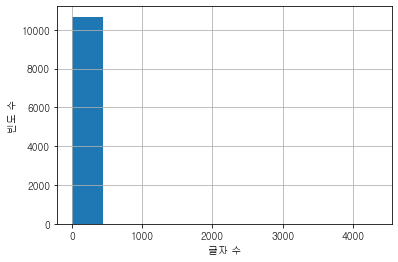

In [24]:
# 제목의  글자 수 히스토그램
ax = train['제목'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

#### 토큰 수 분포


Text(0, 0.5, '빈도 수')

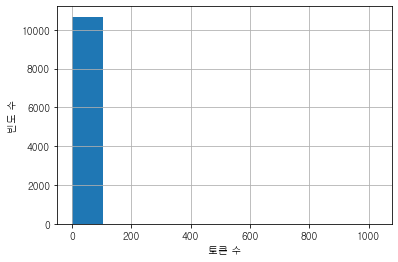

In [32]:
# 토큰 수
ax = train['제목'].str.split().map(lambda x: len(x)).hist()

ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

#### 토큰별 길이 평균 분포

In [27]:
import numpy as np

Text(0, 0.5, '빈도 수')

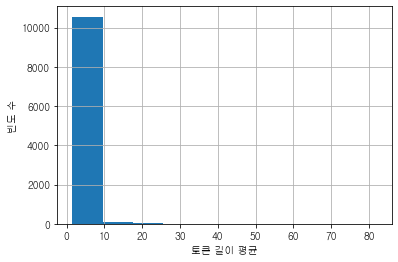

In [29]:
#토큰별 길이 평균
ax = train['제목'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

ax.set_xlabel('토큰 길이 평균')
ax.set_ylabel('빈도 수')

#### 명사 통계
 

-mecab 형태소 분석기를 사용하였으며, 고유명사가 많이 쓰였으나, 실제로 명사 추출이 잘 수행되지는 않아서 데이터를 일부 살펴본 후 사용자 사전에서 추가해 주었다. 

 

-제목 중 명사들의 분포를 조사하고자 한다. 1글자로만 추출된 대상 중 의존명사처럼 의미 없다고 생각되는 경우들도 있어서 1글자를 제외한 내용들도 따로 시각화해 보았다.


In [112]:
#사용자 사전 등록 
user_dic_path = "C:/머신러닝/미니프로젝트/데이터/dic.txt"

from PyKomoran import *

komoran = Komoran('STABLE')
komoran.set_user_dic(user_dic_path)

Text(0.5, 1.0, '명사통계')

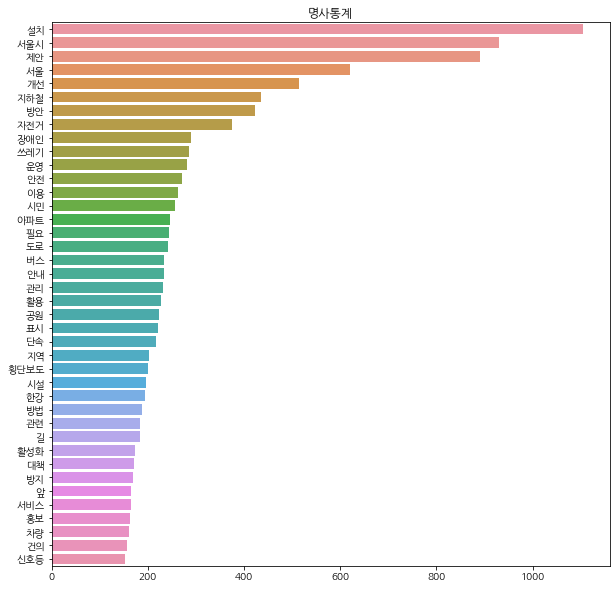

In [160]:
## 명사별 개수 
# 명사 추출 > 전체 코퍼스로 구축 > 개수 세기 > 시각화 
import collections 
import seaborn as sns 
import matplotlib.pyplot as plt 

titles = train['제목'].to_list() 
n_corpus = [] 

for t in titles: 
    n_corpus += komoran.nouns(t) #mecab에서 명사 추출 

count = collections.Counter(n_corpus) 
most = count.most_common() #빈도 수 순으로 추출 

x, y= [], [] 
for word,count in most[:40]: 
    x.append(word) 
    y.append(count) 

plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
sns.barplot(x=y,y=x)
plt.title('명사통계')

Text(0.5, 1.0, '2글자 이상의 명사 통계')

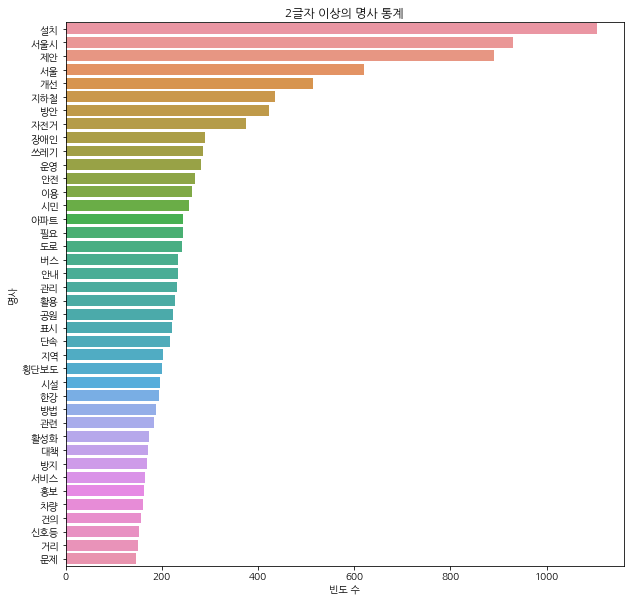

In [163]:
#2글자 이상의 명사 
n_corpus2 = [] 

for t in titles: 
    for n in komoran.nouns(t): 
        if len(n)>1: 
            n_corpus2.append(n) 

count = collections.Counter(n_corpus2) 
most = count.most_common() #빈도 수 순으로 추출 

x, y= [], [] 
for word,count in most[:40]: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
ax = sns.barplot(x=y,y=x) 
ax.set(xlabel = '빈도 수', ylabel = '명사')
ax.set_title('2글자 이상의 명사 통계')

#### 형태소 통계

In [102]:
train['제목']

0                                    횡단보도 사각지대 반사경
1                                자전거 횡단보도 내려서 끌고가기
2                             범죄예방을 위한 투도어현관보조문 설치
3        각각 집마다 간이소화기를 만들어 배치하는 것을 의무로 하였으면 좋겠습니다.
4                           예식장내 부대시설인 음식점의 횡포를...
                           ...                    
10672                               지하철 임산부 지정석 관련
10673                      채동선 작곡가의 서울 집을 보존해 주세요.
10674                                 한강및 지천에서의 안전
10675                                세빛섬 이전 가능한가 ?
10676         한강 시민공원 주차장에 태양광 패널로 지붕을 설치하면 좋겠습니다.
Name: 제목, Length: 10677, dtype: object

Text(0.5, 1.0, '형태소 통계')

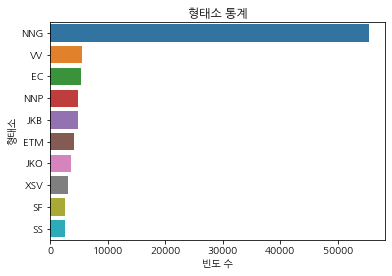

In [162]:
#형태소 분석 후 형태소별 통계, 일반 명사, 고유명사 순 
tags = [] 
for t in titles: 
    temp = komoran.get_list(t)
    for p in temp: 
        tags.append(str(p).split('/')[1]) 
        
counter=collections.Counter(tags) 

x,y=list(map(list,zip(*counter.most_common(10)))) 
ax = sns.barplot(x=y,y=x) 
ax.set(xlabel = '빈도 수', ylabel = '형태소')
ax.set_title('형태소 통계')

### Pandas Profiling

In [ ]:
# 주소 확인
os.chdir("c:/머신러닝/미니프로젝트/데이터")
print(os.getcwd())

c:\머신러닝\미니프로젝트\데이터


In [ ]:
!pip install pandas_profiling

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport 

############ 한글 폰트 지정하는 부분 #################
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname=r"C:\Users\dkq50\AppData\Local\Microsoft\Windows\Fonts\a고딕12.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.


# 레포트 생성 --> html 파일로 저장하기  
## 한글이 깨지시는 분은 제일 아래 코드로 실행해주세요
# 데이터 불러오기
train = pd.read_csv('train.csv',sep='\t')
test1 = pd.read_csv("민주주의 서울 자유제안 정보_17_19.csv")
test2 = pd.read_csv("민주주의 서울 자유제안 정보_20_22.csv",encoding='cp949')
report = test1.profile_report()
report.to_file('글꼴깨지지마시오.html')

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv',sep='\t')
test1 = pd.read_csv("민주주의 서울 자유제안 정보_17_19.csv")
test2 = pd.read_csv("민주주의 서울 자유제안 정보_20_22.csv",encoding='cp949')

In [ ]:
# HTML 변환
train.profile_report().to_file('./capdata_report_train.html')
test1.profile_report().to_file('./capdata_report_test1.html')
test2.profile_report().to_file('./capdata_report_test2.html')